<a href="https://colab.research.google.com/github/iamsaptorshe07/Machine-Learning-Project/blob/master/Occupation_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Method 1 : Importing the necessary set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the data set
file = 'data.csv'
df = pd.read_csv(file)
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [3]:
# Getting the information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
date             9752 non-null object
Temperature      9752 non-null float64
Humidity         9752 non-null float64
Light            9752 non-null float64
CO2              9752 non-null float64
HumidityRatio    9752 non-null float64
Occupancy        9752 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [4]:
# Describing the data set
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [5]:
# Pre Processing
if(df.isnull().values.any()==False):
    print("There is no missing value")
else:
    print("Total No of missing values in dataframe {}".format(df.isnull().sum().sum()))
    print(df.isnull().sum())

There is no missing value


In [6]:
df.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.472921,0.705538,0.199646,-0.010407,0.521767
Humidity,-0.472921,1.000000,-0.187477,-0.079224,0.884104,-0.087768
Light,0.705538,-0.187477,1.000000,0.190213,0.162681,0.914525
CO2,0.199646,-0.079224,0.190213,1.000000,0.043197,0.261908
HumidityRatio,-0.010407,0.884104,0.162681,0.043197,1.000000,0.190161
Occupancy,0.521767,-0.087768,0.914525,0.261908,0.190161,1.000000


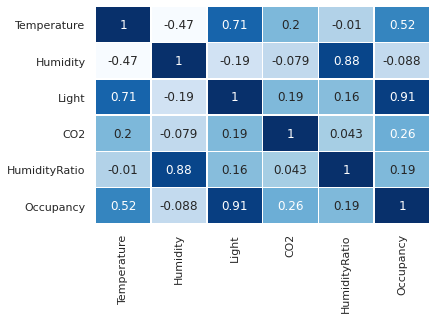

In [7]:
import seaborn as sns
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)
sns.heatmap(df.corr(), annot=True, cbar=False, cmap='Blues',linewidths=0.5)

In [9]:
# Generating the profile report
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,8
Number of observations,9752
Total Missing (%),0.0%
Total size in memory,609.6 KiB
Average record size in memory,64.0 B
Numeric,6
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,1


In [0]:
# Evaluate the performance of a test
class Performance:
    def __init__(self, y_test, y_pred):
        self.cm = confusion_matrix(y_test, y_pred)
        self.acc = accuracy_score(y_test, y_pred)
        self.f1 = f1_score(y_test, y_pred)
        self.fpr, self.tpr, _ = roc_curve(y_test, y_pred)
        self.auroc = auc(self.fpr,self.tpr)

In [0]:
# Import data from CSV/txt file as Pandas DataFrame
def import_data(filename):
    dataset = read_csv(filename, header=0)
    # Drop timestamp (for now)
    dataset.drop('date', axis=1, inplace=True)
    # Convert datetime to time (remove date)
    #dataset['date'] = DatetimeIndex(dataset['date']).time
    # Check for NaN values
    if dataset.isnull().any().any():
        print('Dataset has NaN values, action required.')
    return dataset

In [0]:
# Show the height value above each bar of a barchart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.3f' % height,
                ha='center', va='bottom')


In [0]:
# Define filenames
train_filename = 'datatraining.csv'
test1_filename = 'datatest1.csv'
test2_filename = 'datatest2.csv'

In [0]:
# Import the UCI dataset
df_train = pd.read_csv(train_filename)
df_test1 = pd.read_csv(test1_filename)
df_test2 = pd.read_csv(test2_filename)

In [110]:
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [111]:
df_test1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [112]:
df_test2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [0]:
df_train = df_train.iloc[:,1:len(df_train)-1]
df_test1 = df_test1.iloc[:,1:len(df_test1)-1]
df_test2 = df_test2.iloc[:,1:len(df_test2)-1]

In [114]:
df_test1.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,23.7000,26.272,585.200000,749.200000,0.004764,1
141,23.7180,26.290,578.400000,760.400000,0.004773,1
142,23.7300,26.230,572.666667,769.666667,0.004765,1
143,23.7225,26.125,493.750000,774.750000,0.004744,1
144,23.7540,26.200,488.600000,779.000000,0.004767,1


In [115]:
df_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


In [116]:
df_test2.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [0]:
# Split predictor and target variables
x_train = df_train.values[:,:-1]
y_train = df_train.values[:, -1]
x_test1 = df_test1.values[:,:-1]
y_test1 = df_test1.values[:, -1]
x_test2 = df_test2.values[:,:-1]
y_test2 = df_test2.values[:, -1]

In [0]:
# Train a Random Forest
clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
clf = clf.fit(x_train,y_train)


In [0]:
# Show feature importance (only for Decision Trees / Random Forests)
importance = clf.feature_importances_

In [0]:
# Test the model by predicting the label of the test datasets
y_pred1_rf = clf.predict(x_test1)
y_pred2_rf = clf.predict(x_test2)

In [0]:
# Multi Layer Perceptron - Feedforward Artificial Neural Network
# Network Topology
def mlp_model():
    model = Sequential()
    model.add(Dense(50, input_dim=5, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy']) 
    plot_model(model, to_file='MLP_Model.png', show_shapes = True, show_layer_names = True)
    return model


In [0]:
# Add weights to classes
class_weights = class_weight.compute_class_weight('balanced', 
                                                  np.unique(y_train), 
                                                  y_train)
estimator = []
estimator.append(('standardize', StandardScaler()))
estimator.append(('mlp', KerasClassifier(build_fn=mlp_model, 
                                         epochs=2, 
                                         batch_size=50, 
                                         verbose=1, 
                                         class_weight=class_weights)))
# Pipeline of transforms and estimators
pipeline = Pipeline(estimator)


In [127]:
# Train the network
pipeline.fit(x_train, y_train)

# Test the network
y_pred1_mlp = pipeline.predict(x_test1)
y_pred2_mlp = pipeline.predict(x_test2)


Epoch 1/2
8143/8143 [==============================] - 1s 87us/step - loss: 0.1911 - acc: 0.9519
Epoch 2/2
9752/9752 [==============================] - 0s 11us/step


In [0]:
# Prepare the data for One-Class SVM (semi-supervised)
x_train_svm = []
x_test_svm = []

In [0]:
for row in df_train.values:
    if row[-1] == 1: #occupied
        x_train_svm.append(row[0:5])
    else: #unoccupied
        x_test_svm.append(row[0:5])

x_test_svm = np.asarray(x_test_svm)
x_train_svm = np.asarray(x_train_svm)


In [130]:
# Train the OC-SVM on *OCCUPIED* data
ocsvm = svm.OneClassSVM(nu=0.01, kernel='poly', gamma=0.3, degree=2)
ocsvm.fit(x_train_svm)

OneClassSVM(cache_size=200, coef0=0.0, degree=2, gamma=0.3, kernel='poly',
            max_iter=-1, nu=0.01, shrinking=True, tol=0.001, verbose=False)

In [0]:
# Test the OC-SVM
y_pred1_ocsvm = ocsvm.predict(x_test1)
y_pred2_ocsvm = ocsvm.predict(x_test2)


In [0]:
# Map OCSVM output from [-1,1] to [0,1] for compatibility
label_encoder = LabelEncoder()
label_encoder.fit([-1,1])
y_pred1_ocsvm = label_encoder.transform(y_pred1_ocsvm) 
y_pred2_ocsvm = label_encoder.transform(y_pred2_ocsvm)

In [0]:
## Results
# Evaluate all models on all test datasets
rf1 = Performance(y_test1, y_pred1_rf)
rf2 = Performance(y_test2, y_pred2_rf)
mlp1 = Performance(y_test1, y_pred1_mlp)
mlp2 = Performance(y_test2, y_pred2_mlp)
ocsvm1 = Performance(y_test1, y_pred1_ocsvm)
ocsvm2 = Performance(y_test2, y_pred2_ocsvm)

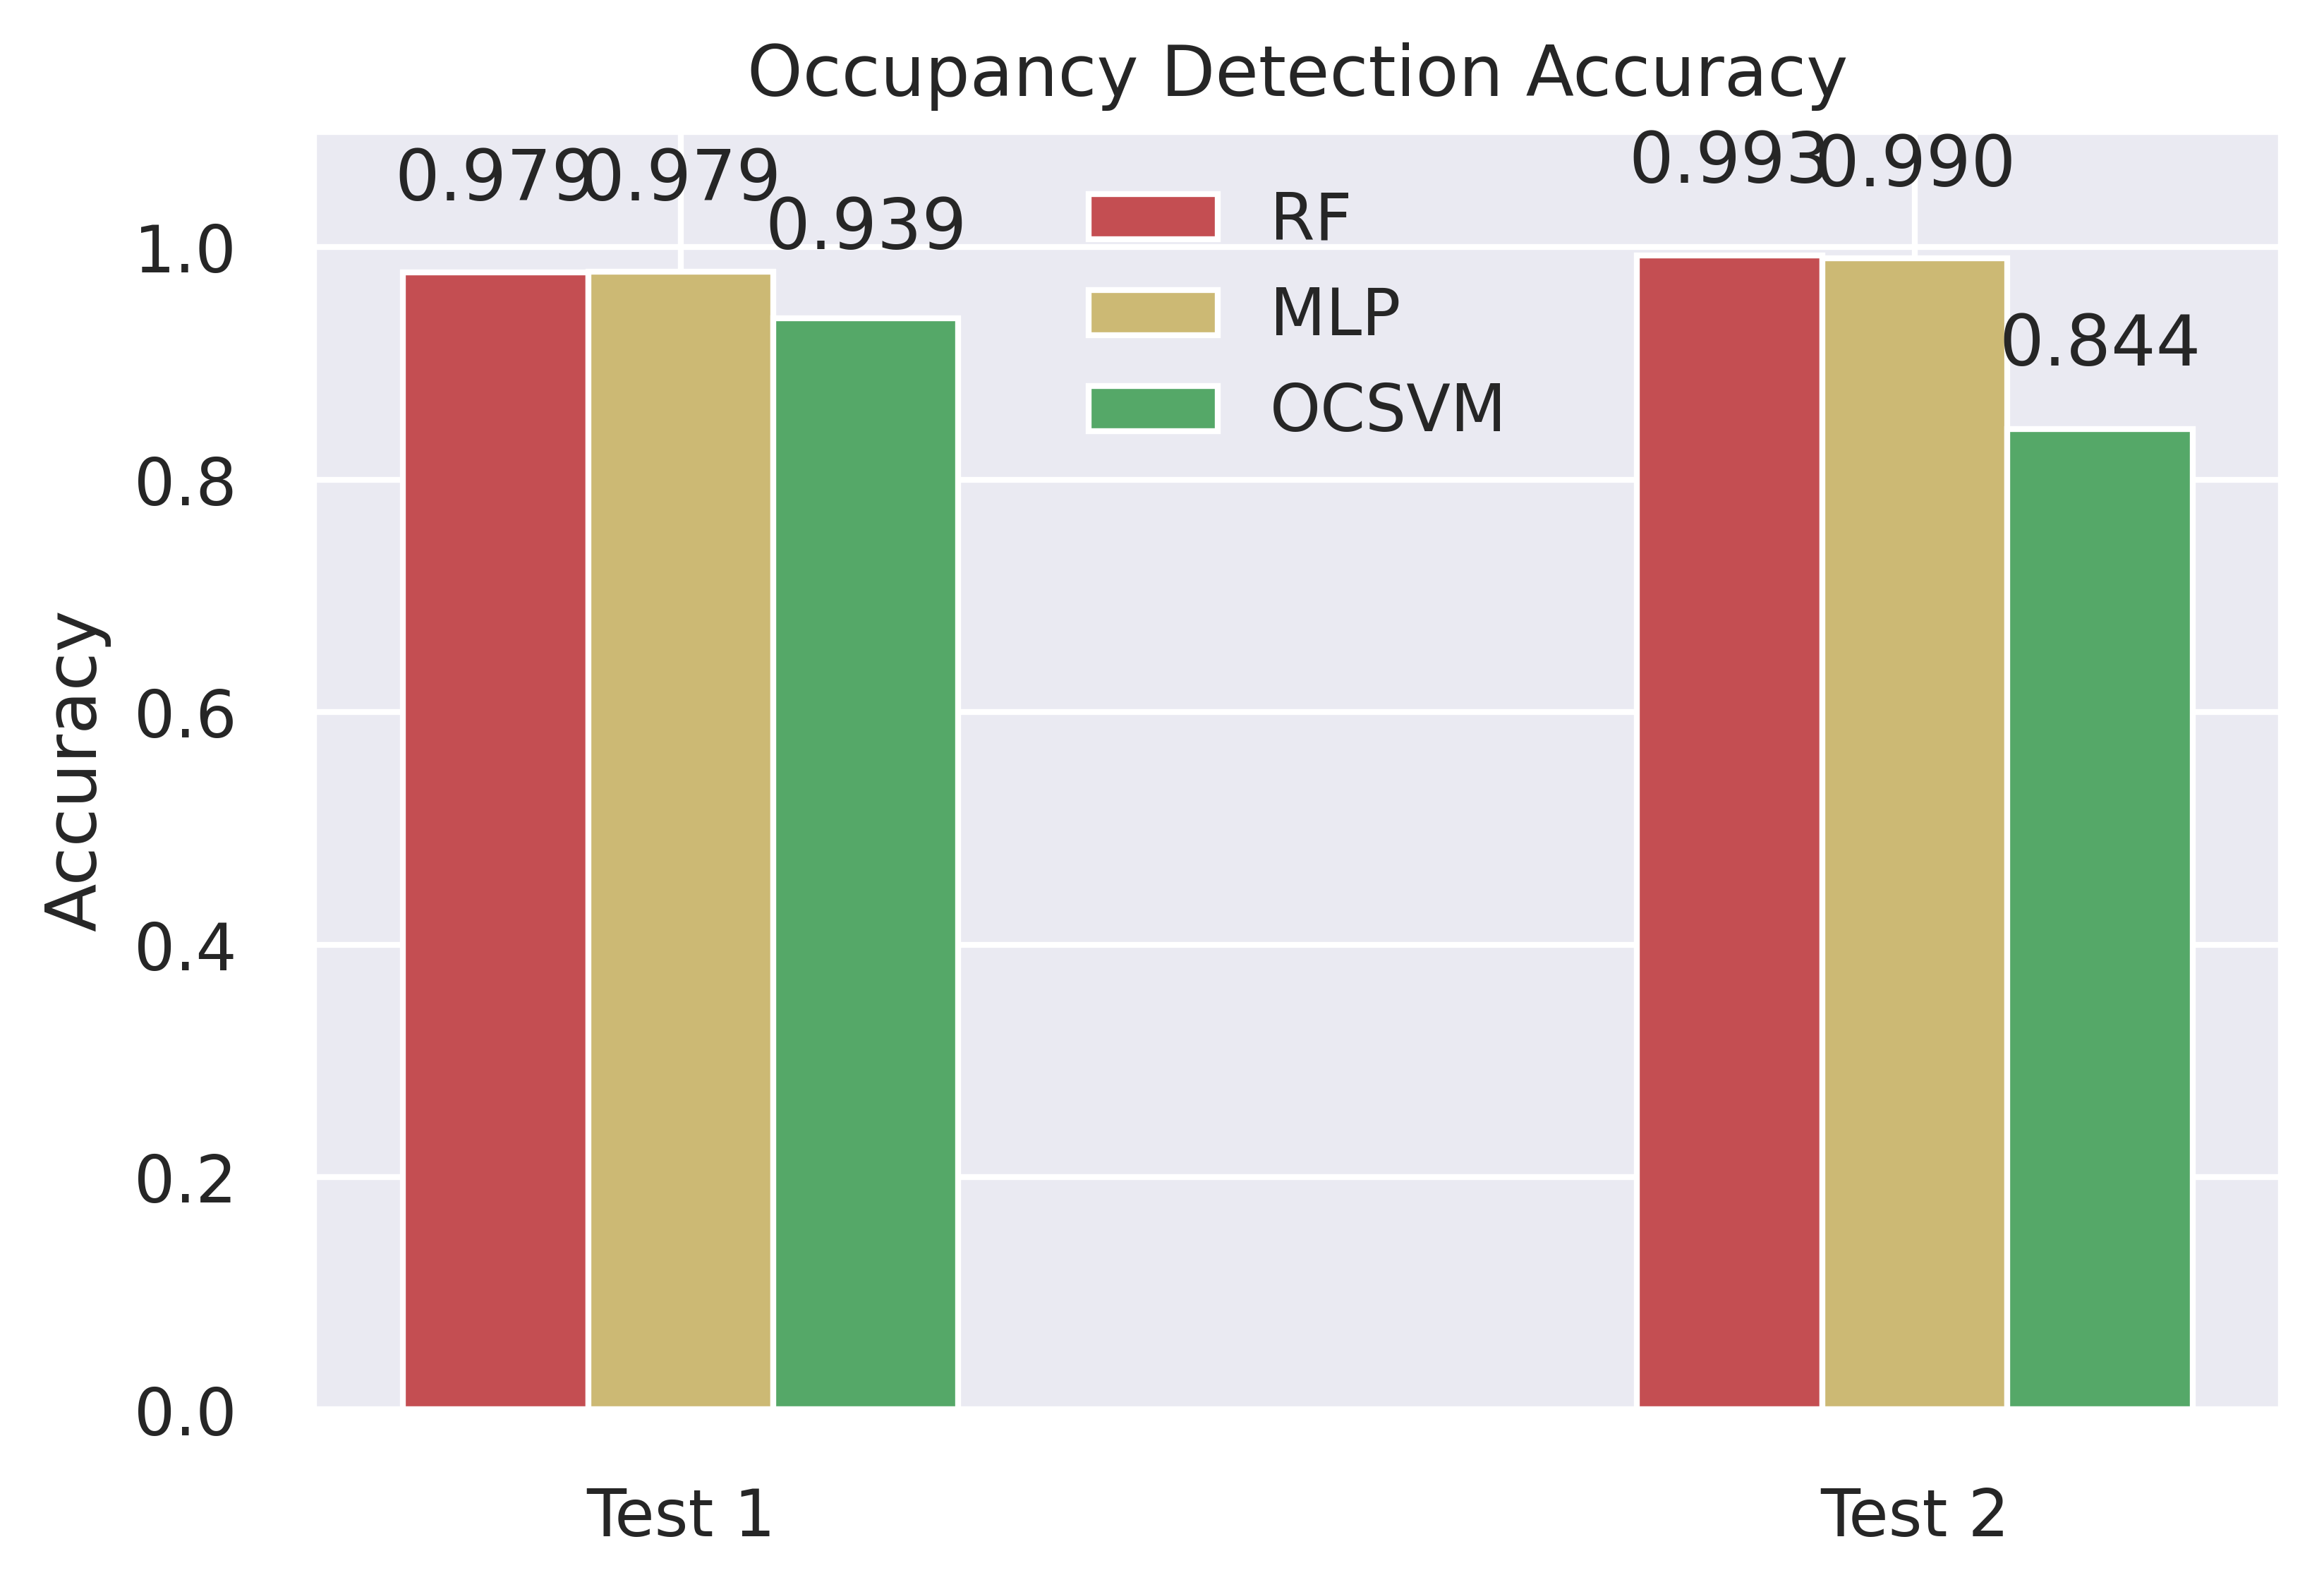

In [135]:

# Accuracy
fig, ax = plt.subplots(dpi=600)
ind = np.arange(2)
width = 0.15
acc_rf = (rf1.acc, rf2.acc)
bars_rf = ax.bar(ind, acc_rf, width, color='r')
acc_mlp = (mlp1.acc, mlp2.acc)
bars_mlp = ax.bar(ind + width, acc_mlp, width, color='y')
acc_ocsvm = (ocsvm1.acc, ocsvm2.acc)
bars_ocsvm = ax.bar(ind + 2*width, acc_ocsvm, width, color='g')
ax.set_ylim([0, 1.1])
ax.set_ylabel('Accuracy')
ax.set_title('Occupancy Detection Accuracy')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Test 1', 'Test 2'))
ax.legend((bars_rf[0], bars_mlp[0], bars_ocsvm[0]), 
          ('RF', 'MLP', 'OCSVM'), loc='upper center')
autolabel(bars_rf)
autolabel(bars_mlp)
autolabel(bars_ocsvm)
plt.savefig('Accuracy.png')

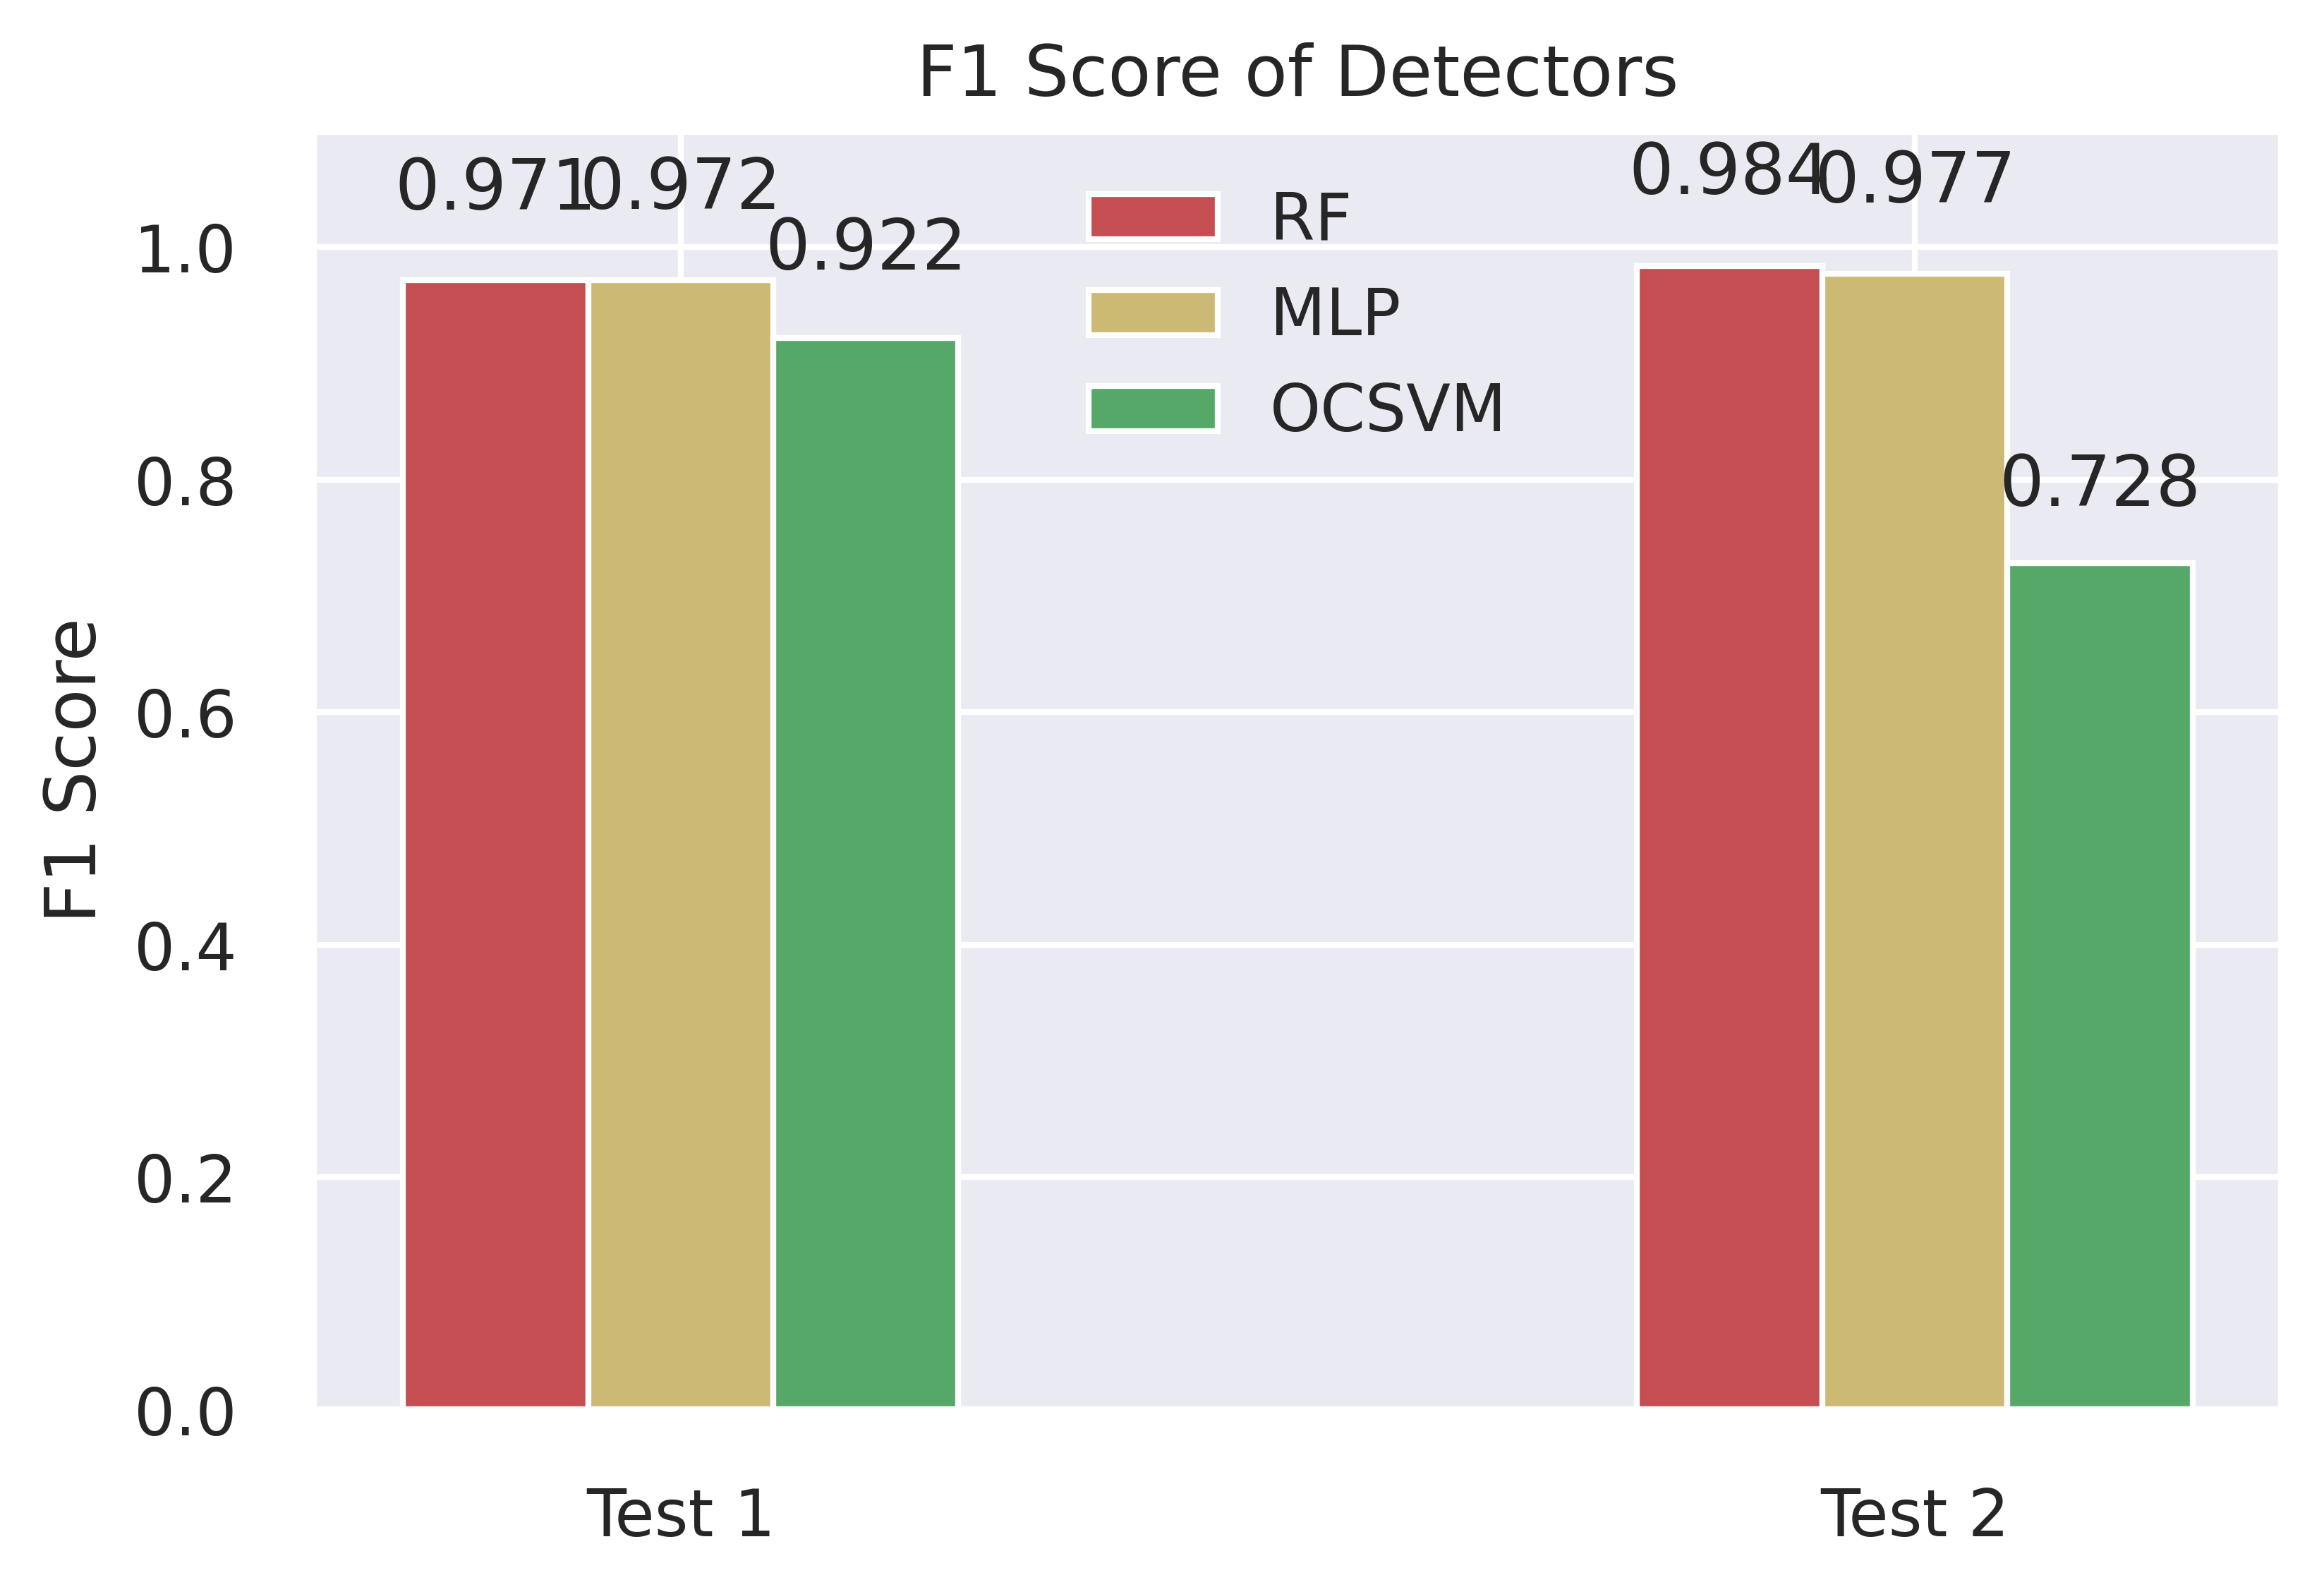

In [136]:
# F1 Score
fig, ax = plt.subplots(dpi=600)
ind = np.arange(2)
width = 0.15
f1_rf = (rf1.f1, rf2.f1)
bars_rf = ax.bar(ind, f1_rf, width, color='r')
f1_mlp = (mlp1.f1, mlp2.f1)
bars_mlp = ax.bar(ind + width, f1_mlp, width, color='y')
f1_ocsvm = (ocsvm1.f1, ocsvm2.f1)
bars_ocsvm = ax.bar(ind + 2*width, f1_ocsvm, width, color='g')
ax.set_ylim([0, 1.1])
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score of Detectors')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Test 1', 'Test 2'))
ax.legend((bars_rf[0], bars_mlp[0], bars_ocsvm[0]), 
          ('RF', 'MLP', 'OCSVM'), loc='upper center')
autolabel(bars_rf)
autolabel(bars_mlp)
autolabel(bars_ocsvm)
plt.savefig('F1-Score.png')


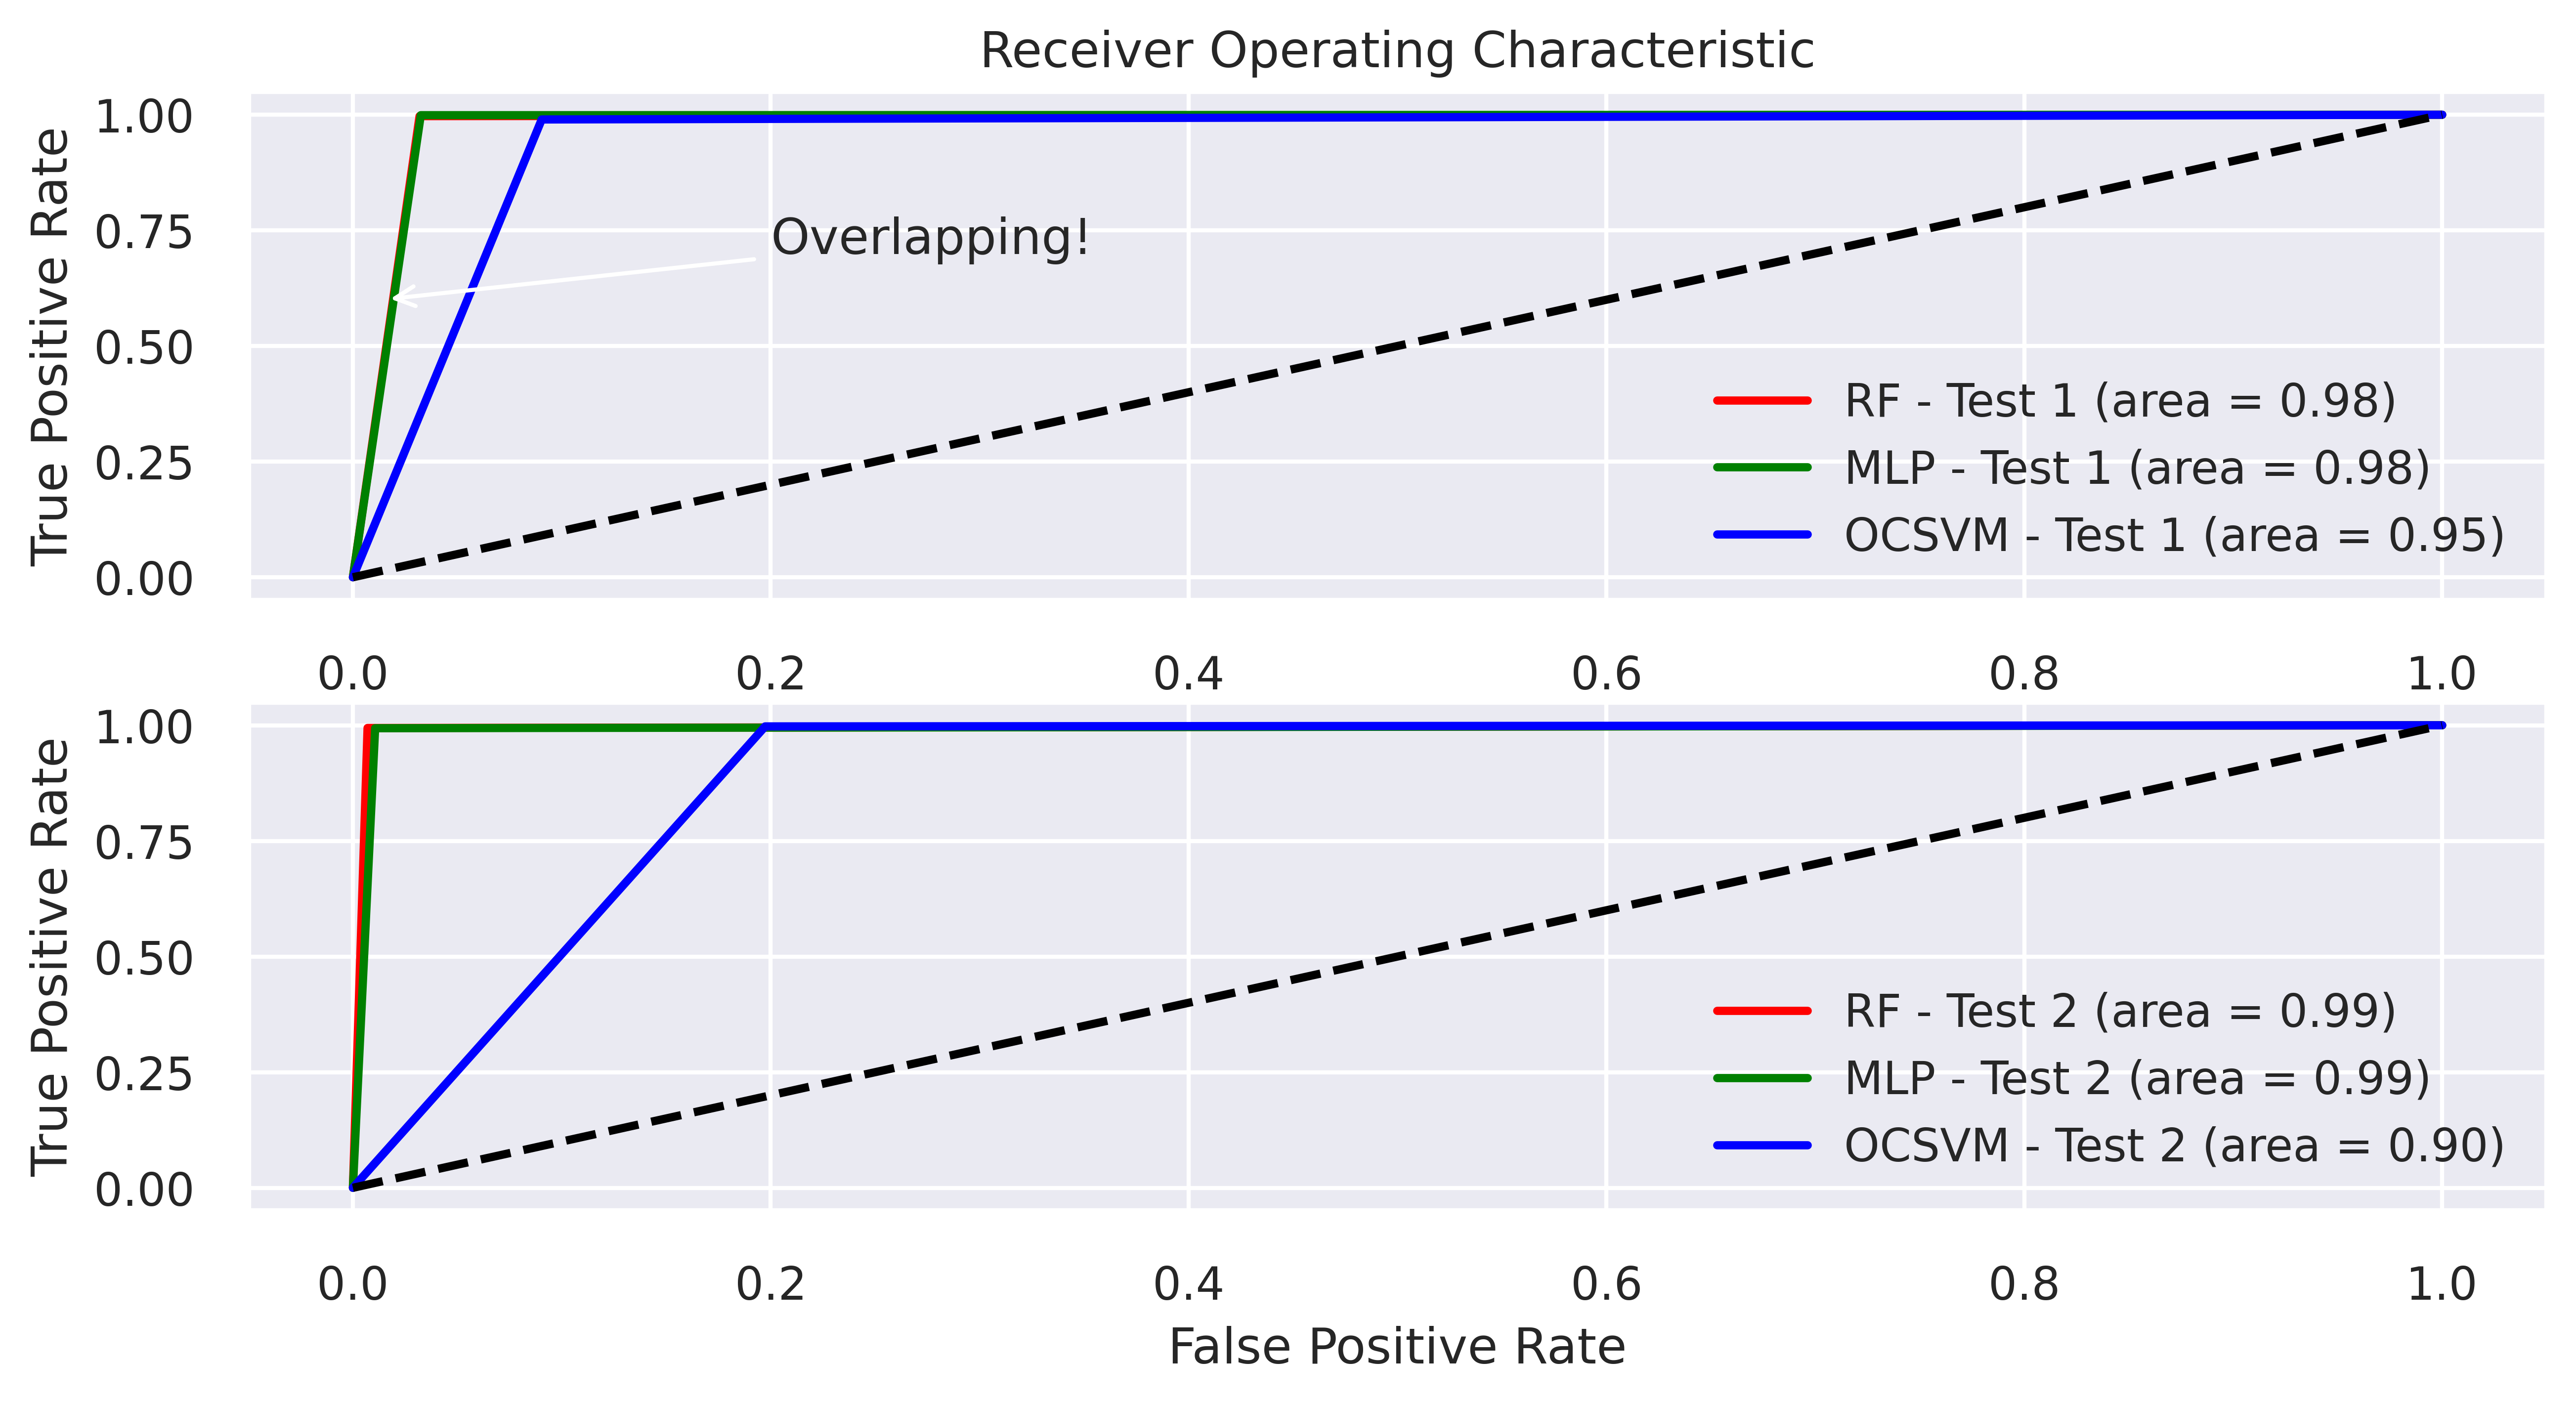

In [137]:
# AUROC
plt.figure(figsize=(10,5), dpi=600)
lw = 2
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# Test 1
plt.subplot(211)
plt.plot(rf1.fpr, rf1.tpr, color='red',
         lw=lw, label='RF - Test 1 (area = %0.2f)' % rf1.auroc)
plt.plot(mlp1.fpr, mlp1.tpr, color='green',
         lw=lw, label='MLP - Test 1 (area = %0.2f)' % mlp1.auroc)
plt.plot(ocsvm1.fpr, ocsvm1.tpr, color='blue',
         lw=lw, label='OCSVM - Test 1 (area = %0.2f)' % ocsvm1.auroc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.annotate('Overlapping!', 
             xy=(0.014, 0.6), 
             arrowprops=dict(arrowstyle='->'), 
             xytext=(0.2, 0.7))
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
# Test 2
plt.subplot(212)
plt.plot(rf2.fpr, rf2.tpr, color='red',
         lw=lw, label='RF - Test 2 (area = %0.2f)' % rf2.auroc)
plt.plot(mlp2.fpr, mlp2.tpr, color='green',
         lw=lw, label='MLP - Test 2 (area = %0.2f)' % mlp2.auroc)
plt.plot(ocsvm2.fpr, ocsvm2.tpr, color='blue',
         lw=lw, label='OCSVM - Test 2 (area = %0.2f)' % ocsvm2.auroc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('AUROC.png')